In [3]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [4]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os

In [5]:
seed = 0
np.random.seed(seed)
tf.set_random_seed(seed)

In [6]:
df_pre = pd.read_csv('dataset/wine.csv', header=None)
df = df_pre.sample(frac=1)

dataset = df.values
X = dataset[:, 0:12]
Y = dataset[:, 12]

In [7]:
model = Sequential()
model.add(Dense(30, input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [8]:
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [9]:
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

In [10]:
modelpath = "./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, 
                               monitor="val_loss", 
                               verbose=1, 
                               save_best_only=True)

In [16]:
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=100)

In [17]:
history = model.fit(X, Y, validation_split=0.2, epochs=2000, batch_size=500, 
                    callbacks=[early_stopping_callback])


Train on 5197 samples, validate on 1300 samples
Epoch 1/2000
5197/5197 [==============================] - 0s 11us/step - loss: 0.0211 - acc: 0.9960 - val_loss: 0.0541 - val_acc: 0.9923
Epoch 2/2000
5197/5197 [==============================] - 0s 12us/step - loss: 0.0209 - acc: 0.9954 - val_loss: 0.0525 - val_acc: 0.9923
Epoch 3/2000
5197/5197 [==============================] - 0s 17us/step - loss: 0.0221 - acc: 0.9946 - val_loss: 0.0454 - val_acc: 0.9938
Epoch 4/2000
5197/5197 [==============================] - 0s 15us/step - loss: 0.0220 - acc: 0.9948 - val_loss: 0.0468 - val_acc: 0.9923
Epoch 5/2000
5197/5197 [==============================] - 0s 11us/step - loss: 0.0209 - acc: 0.9946 - val_loss: 0.0487 - val_acc: 0.9923
Epoch 6/2000
5197/5197 [==============================] - 0s 12us/step - loss: 0.0205 - acc: 0.9954 - val_loss: 0.0495 - val_acc: 0.9931
Epoch 7/2000
5197/5197 [==============================] - 0s 16us/step - loss: 0.0207 - acc: 0.9948 - val_loss: 0.0609 - val_acc: 

In [18]:
y_vloss = history.history['val_loss']
y_acc = history.history['acc']

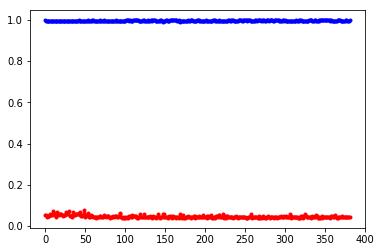

In [19]:
x_len = np.arange(len(y_acc))
plt.plot(x_len, y_vloss, "o", c="red", markersize=3)
plt.plot(x_len, y_acc, "o", c="blue", markersize=3)
plt.show()

In [20]:
print("Accuracy: %.4f" % (model.evaluate(X, Y)[1]))

6497/6497 [==============================] - 0s 37us/step
Accuracy: 0.9937
